In [1]:
from sklearn.datasets import fetch_20newsgroups

# Load the full dataset (you can choose subsets too)
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data


**Preprocess the Text**

In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Convert to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(documents)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Apply K-Means Clustering**

In [3]:
from sklearn.cluster import KMeans

k = 20  # Assuming 20 clusters for 20 newsgroups
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)

# View cluster labels
labels_kmeans = kmeans.labels_


**Apply Latent Dirichlet Allocation (LDA)**

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', random_state=42)
lda.fit(X_tfidf)

# Assign topic to each document
lda_topic_assignments = lda.transform(X_tfidf)


**View Topics from LDA**

In [5]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


Topic 1:  windows use card drive thanks software like know does problem
Topic 2:  sale offer shipping email asking sell interested looking reply 800
Topic 3:  bike engine blood design happened dc wanted effect cause bought
Topic 4:  game team year games 00 10 season hockey players play
Topic 5:  edu file files ftp cs steve gif appreciated directory pub
Topic 6:  com uk ac graphics sun article internet version comp available
Topic 7:  yes think use buy don problem watch let lot thought
Topic 8:  info ca university weeks computer science guy mb hours problems
Topic 9:  widget motif server hp application error keyboard code x11 page
Topic 10:  game heard games haven baseball soon edu night max ax
Topic 11:  fbi koresh batf women children face stuff door cancer men
Topic 12:  thanks list mail advance post cd tell know mac hear
Topic 13:  people don government just like think state time right know
Topic 14:  just don like know think right time good ve bike
Topic 15:  david does energy know 

**Visualize with t-SNE**

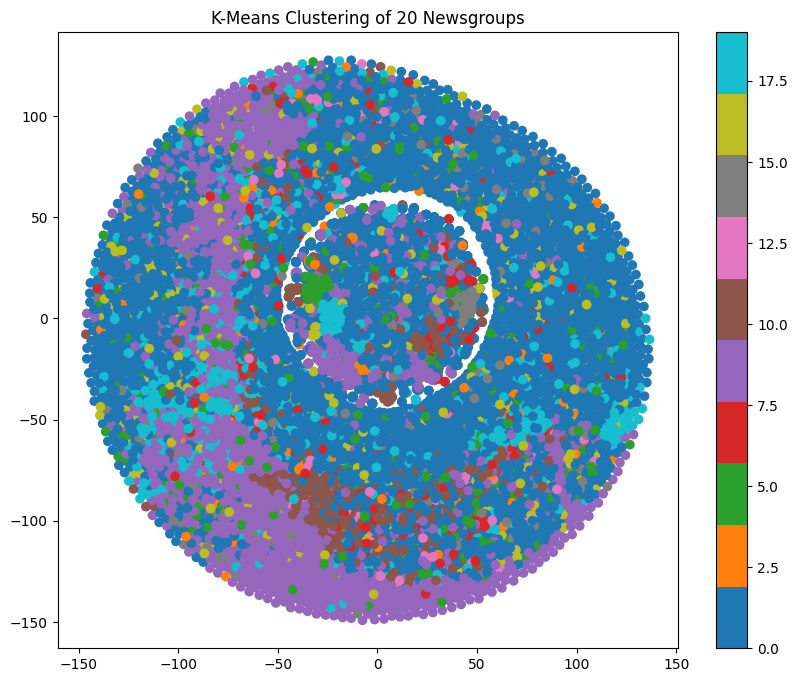

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2, perplexity=30).fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_kmeans, cmap='tab10')
plt.colorbar()
plt.title("K-Means Clustering of 20 Newsgroups")
plt.show()
